Develop a hand gesture recognition model that can accurately identify and classify different hand gestures from image or video data, enabling intuitive human-computer interaction and gesture-based control systems.

In [233]:
import keras
import matplotlib.pyplot as plt
import seaborn as sn
import os
import cv2
import numpy as np
import random
import keras.backend as k
from keras.callbacks import Callback,ModelCheckpoint
from keras.models import Sequential,load_model
from keras.layers import Dense,Dropout
import tensorflow.keras as keras
from scikeras.wrappers import KerasClassifier
import keras.backend as KeyError
from sklearn.datasets import make_multilabel_classification
from keras.layers import Conv2D,Activation,MaxPool2D,Dense,Flatten,Dropout
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix


In [234]:
categories=["01_palm","02_l","03_fist","04_fist_moved","05_thumb","06_index","07_ok","08_palm_moved","09_c","10_down"]
Img_size=50
data="C:/Users/RIYA/Desktop/Internships/Machine Learning/ML04/img"

In [235]:
# image_data=[]
# for dr in os.listdir(data):
#     for category in categories:
#         class_index=categories.index(category)
#         path=os.path.join(data,dr,category)
#         for img in os.listdir(path):
#             try:
#                 img_array=cv2.imread(os.path.join(path,img),cv2.IMREAD_ANYCOLOR)
#                 image_data.append([cv2.resize(img_array,(Img_size)),class_index])
#             except Exception as e:
#                 pass
#             image_data[0]

image_data = []

# Iterate over each category
for category in categories:
    class_index = categories.index(category)
    path = os.path.join(data, category)
    
    # Check if the path exists
    if not os.path.exists(path):
        print(f"Path does not exist: {path}")
        continue
    
    # Iterate over each image in the category directory
    for img in os.listdir(path):
        try:
            img_path = os.path.join(path, img)
            img_array = cv2.imread(img_path, cv2.IMREAD_COLOR)
            
            if img_array is not None:
                resized_img = cv2.resize(img_array, (Img_size, Img_size))
                image_data.append([resized_img, class_index])
        except Exception as e:
            print(f"Error loading image {img_path}: {e}")
            pass

# Check if image_data is not empty
if image_data:
    # Print the first image data for verification
    print(image_data[0])
else:
    print("No image data loaded.")

# Optionally, shuffle the data to mix the images and labels
import random
random.shuffle(image_data)

# Separate the features and labels
X = []
y = []

for features, label in image_data:
    X.append(features)
    y.append(label)

# Convert lists to numpy arrays
X = np.array(X)
y = np.array(y)

# Verify shapes
print(f"Shape of X before reshaping: {X.shape}")

# Reshape X to include the channel dimension
X = X.reshape(-1, Img_size, Img_size, 3)  # 3 channels for color images

# Normalize the feature data
X = X / 255.0

# Verify shapes after reshaping
print(f"Shape of X after reshaping: {X.shape}")
print(f"Shape of y: {y.shape}")

print(f"Loaded {len(image_data)} images.")

[array([[[5, 5, 5],
        [4, 4, 4],
        [4, 4, 4],
        ...,
        [3, 3, 3],
        [4, 4, 4],
        [2, 2, 2]],

       [[5, 5, 5],
        [4, 4, 4],
        [5, 5, 5],
        ...,
        [3, 3, 3],
        [3, 3, 3],
        [3, 3, 3]],

       [[4, 4, 4],
        [5, 5, 5],
        [4, 4, 4],
        ...,
        [4, 4, 4],
        [5, 5, 5],
        [3, 3, 3]],

       ...,

       [[4, 4, 4],
        [5, 5, 5],
        [5, 5, 5],
        ...,
        [5, 5, 5],
        [5, 5, 5],
        [5, 5, 5]],

       [[5, 5, 5],
        [5, 5, 5],
        [6, 6, 6],
        ...,
        [5, 5, 5],
        [7, 7, 7],
        [4, 4, 4]],

       [[4, 4, 4],
        [7, 7, 7],
        [5, 5, 5],
        ...,
        [5, 5, 5],
        [4, 4, 4],
        [4, 4, 4]]], dtype=uint8), 0]
Shape of X before reshaping: (2000, 50, 50, 3)
Shape of X after reshaping: (2000, 50, 50, 3)
Shape of y: (2000,)
Loaded 2000 images.


In [236]:
random.shuffle(image_data)

Length of input_data: 2000
Length of label: 2000
[array([[[5, 5, 5],
        [6, 6, 6],
        [7, 7, 7],
        ...,
        [5, 5, 5],
        [5, 5, 5],
        [5, 5, 5]],

       [[5, 5, 5],
        [7, 7, 7],
        [6, 6, 6],
        ...,
        [5, 5, 5],
        [3, 3, 3],
        [3, 3, 3]],

       [[7, 7, 7],
        [6, 6, 6],
        [7, 7, 7],
        ...,
        [4, 4, 4],
        [4, 4, 4],
        [4, 4, 4]],

       ...,

       [[6, 6, 6],
        [6, 6, 6],
        [6, 6, 6],
        ...,
        [7, 7, 7],
        [6, 6, 6],
        [5, 5, 5]],

       [[5, 5, 5],
        [6, 6, 6],
        [5, 5, 5],
        ...,
        [5, 5, 5],
        [6, 6, 6],
        [5, 5, 5]],

       [[6, 6, 6],
        [5, 5, 5],
        [6, 6, 6],
        ...,
        [6, 6, 6],
        [6, 6, 6],
        [6, 6, 6]]], dtype=uint8), array([[[5, 5, 5],
        [5, 5, 5],
        [6, 6, 6],
        ...,
        [3, 3, 3],
        [4, 4, 4],
        [4, 4, 4]],

       [[4, 4, 4],
 

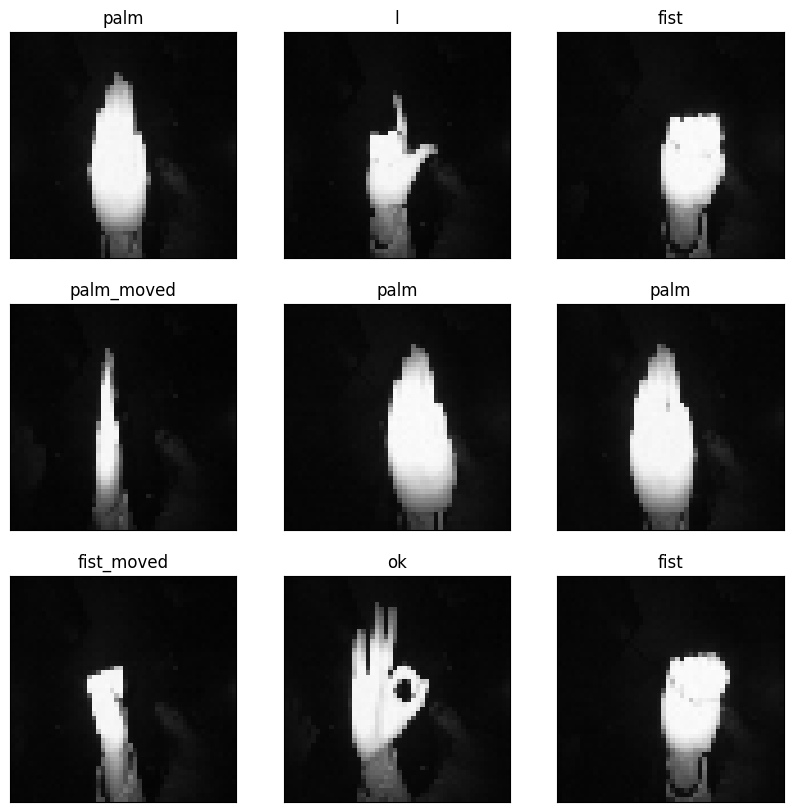

In [237]:
import matplotlib.pyplot as plt

input_data = []
label = []

for X, y in image_data:
    input_data.append(X)
    label.append(y)

# Check the lengths of input_data and label lists
print(f"Length of input_data: {len(input_data)}")
print(f"Length of label: {len(label)}")

# Display the first 5 elements of input_data and the first 10 elements of label
print(input_data[:5])
print(label[:10])

# Ensure we have at least 9 images and labels to display
num_images_to_display = min(9, len(input_data), len(label))

# Plotting the first num_images_to_display images with their labels
plt.figure(figsize=(10, 10))
for i in range(num_images_to_display):
    plt.subplot(3, 3, i + 1)
    plt.imshow(input_data[i], cmap='hot')
    plt.xticks([])
    plt.yticks([])
    plt.title(categories[label[i]][3:])  # Title excluding the prefix number
plt.show()


In [238]:
#normalizing
input_data=np.array(input_data)
label=np.array(label)
input_data=input_data/255.0
input_data.shape

(2000, 50, 50, 3)

In [239]:
X,y=make_multilabel_classification(n_samples=500,n_features=4,n_classes=2,n_labels=3,random_state=1)

<function matplotlib.pyplot.show(close=None, block=None)>

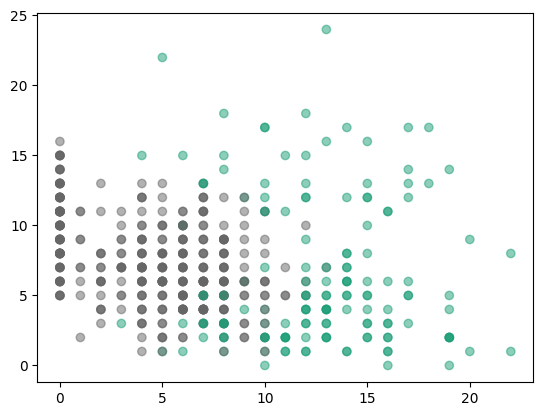

In [240]:
rng=np.random.RandomState(i)
colors=rng.rand(1000)
plt.scatter(X[:,0:1],X[:,1:2],c=y[:,0],alpha=0.5,cmap='Dark2')
plt.show

In [241]:
X=(X-X.min())/(X.max()-X.min())
X

array([[0.20454545, 0.27272727, 0.13636364, 0.27272727],
       [0.11363636, 0.04545455, 0.27272727, 0.5       ],
       [0.34090909, 0.11363636, 0.27272727, 0.25      ],
       ...,
       [0.11363636, 0.22727273, 0.34090909, 0.63636364],
       [0.        , 0.18181818, 0.36363636, 0.61363636],
       [0.13636364, 0.20454545, 0.29545455, 0.5       ]])

In [242]:
from tensorflow.keras.utils import to_categorical

# Convert labels to one-hot encoded format
label = to_categorical(label, num_classes=10)
print(label[0])


[1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


In [243]:

X_train, X_test, y_train, y_test = train_test_split(input_data, label, test_size = 0.10, random_state=0)
X_train.shape,y_train.shape,X_test.shape,y_test.shape

((1800, 50, 50, 3), (1800, 10), (200, 50, 50, 3), (200, 10))

In [244]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense, Activation

model = Sequential()

model.add(Conv2D(filters=32, kernel_size=(3,3), input_shape=(Img_size, Img_size, 3)))  # Adjust input shape to (Img_size, Img_size, 3)
model.add(Activation('relu'))

model.add(Conv2D(filters=32, kernel_size=(3,3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.3))

model.add(Conv2D(filters=64, kernel_size=(3,3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.3))

model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dense(10, activation='softmax'))

model.compile(loss='categorical_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])

# Train the model
history=model.fit(X_train, y_train, epochs=5, batch_size=32, validation_data=(X_test, y_test))


C:\Users\RIYA\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/5
57/57 ━━━━━━━━━━━━━━━━━━━━ 6s 79ms/step - accuracy: 0.5588 - loss: 1.3118 - val_accuracy: 0.9950 - val_loss: 0.0190
Epoch 2/5
57/57 ━━━━━━━━━━━━━━━━━━━━ 4s 77ms/step - accuracy: 0.9774 - loss: 0.0714 - val_accuracy: 0.9850 - val_loss: 0.0254
Epoch 3/5
57/57 ━━━━━━━━━━━━━━━━━━━━ 5s 79ms/step - accuracy: 0.9968 - loss: 0.0234 - val_accuracy: 1.0000 - val_loss: 0.0023
Epoch 4/5
57/57 ━━━━━━━━━━━━━━━━━━━━ 5s 79ms/step - accuracy: 1.0000 - loss: 3.6264e-04 - val_accuracy: 1.0000 - val_loss: 2.5039e-04
Epoch 5/5
57/57 ━━━━━━━━━━━━━━━━━━━━ 5s 79ms/step - accuracy: 1.0000 - loss: 2.5601e-05 - val_accuracy: 1.0000 - val_loss: 2.8655e-04
Test accuracy: 100.00%


In [245]:
# Print model summary
model.summary()

Model: "sequential_25"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_69 (Conv2D)              │ (None, 48, 48, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_69 (Activation)      │ (None, 48, 48, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_70 (Conv2D)              │ (None, 46, 46, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_70 (Activation)      │ (None, 46, 46, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_46 (MaxPooling2D) │ (None, 23, 23, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_46 (Dropout)            │ (None, 23, 23, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_71 (Conv2D)              │ (None, 21, 21, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_71 (Activation)      │ (None, 21, 21, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_47 (MaxPooling2D) │ (None, 10, 10, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_47 (Dropout)            │ (None, 10, 10, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_23 (Flatten)            │ (None, 6400)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_46 (Dense)                │ (None, 256)            │     1,638,656 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_47 (Dense)                │ (None, 10)             │         2,570 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,339,734 (12.74 MB)

 Trainable params: 1,669,866 (6.37 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 1,669,868 (6.37 MB)

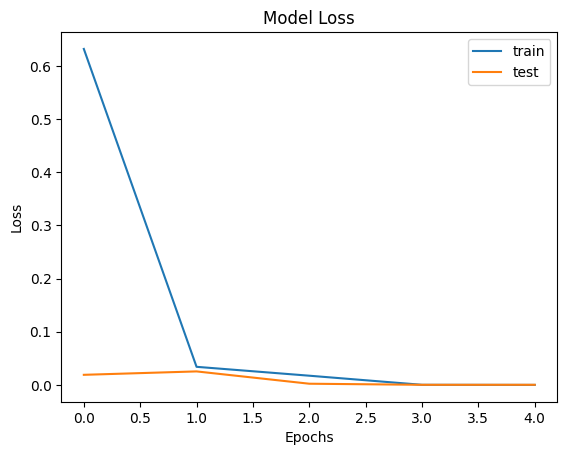

In [246]:
plt.plot(model.history.history['loss'])
plt.plot(model.history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend(['train', 'test'])
plt.show()

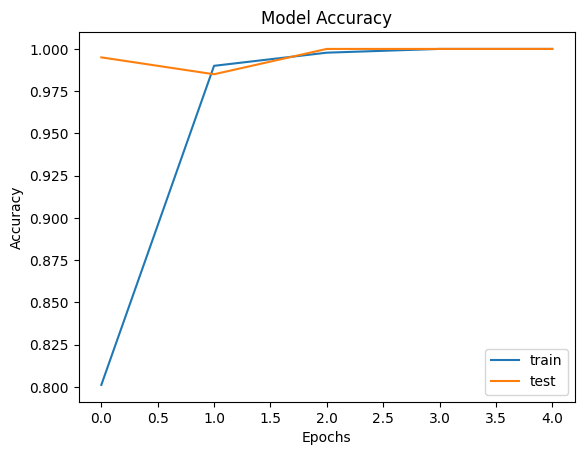

In [247]:
plt.plot(model.history.history['accuracy'])
plt.plot(model.history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['train', 'test'])
plt.show()

In [248]:
test_loss, test_accuracy = model.evaluate(X_test, y_test)

print('Test accuracy: {:2.2f}%'.format(test_accuracy*100))

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - accuracy: 1.0000 - loss: 1.3238e-04
Test accuracy: 100.00%


In [249]:
train_loss, train_accuracy = model.evaluate(X_train, y_train)

print('Train accuracy: {:2.2f}%'.format(train_accuracy*100))

57/57 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - accuracy: 1.0000 - loss: 5.2976e-06
Train accuracy: 100.00%


7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


[]

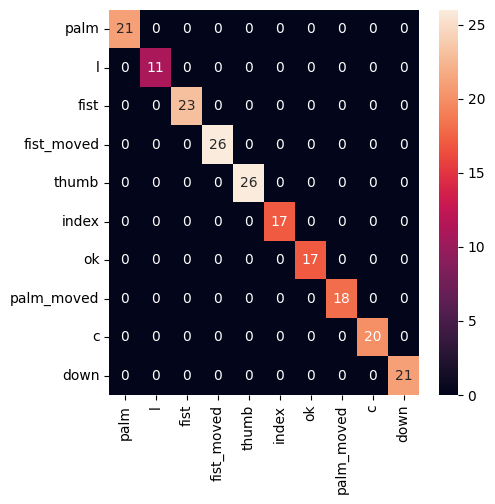

In [250]:
cat = [c[3:] for c in categories]
plt.figure(figsize=(5,5))

cm = confusion_matrix(np.argmax(y_test, axis=1), np.argmax(model.predict(X_test), axis=1))
sn.heatmap(cm, annot=True,xticklabels=cat, yticklabels=cat)
plt.plot()

57/57 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step


[]

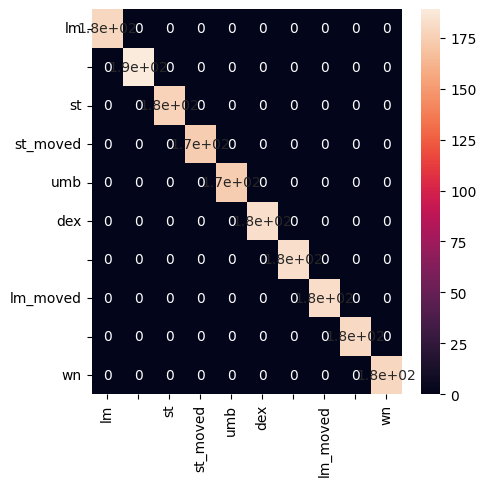

In [251]:
cat = [c[5:] for c in categories]
plt.figure(figsize=(5,5))

cm = confusion_matrix(np.argmax(y_train, axis=1), np.argmax(model.predict(X_train), axis=1))
sn.heatmap(cm, annot=True,xticklabels=cat, yticklabels=cat)
plt.plot()
